In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import metrics
from keras.models import load_model

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

Using TensorFlow backend.


Criação do modelo usando 4 anos de numéricas como entrada

In [2]:
train07091113 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_4anos\train_0713.csv')
train09111315 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_4anos\train_0915.csv')

In [3]:
pred11131517 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_4anos\pred_1117.csv')

In [4]:
train07091113_idebs = pd.DataFrame()
train09111315_idebs = pd.DataFrame()
train11131517_idebs = pd.DataFrame()
pred11131517_idebs = pd.DataFrame()

train07091113_idebs['Ideb2007'] = train07091113['Ideb2007']
train07091113_idebs['Ideb2009'] = train07091113['Ideb2009']
train07091113_idebs['Ideb2011'] = train07091113['Ideb2011']
train07091113_idebs['Ideb2013'] = train07091113['Ideb2013']

train09111315_idebs['Ideb2009'] = train09111315['Ideb2009']
train09111315_idebs['Ideb2011'] = train09111315['Ideb2011']
train09111315_idebs['Ideb2013'] = train09111315['Ideb2013']
train09111315_idebs['Ideb2015'] = train09111315['Ideb2015']

pred11131517_idebs['Ideb2011'] = pred11131517['Ideb2011']
pred11131517_idebs['Ideb2013'] = pred11131517['Ideb2013']
pred11131517_idebs['Ideb2015'] = pred11131517['Ideb2015']
pred11131517_idebs['Ideb2017'] = pred11131517['Ideb2017']

In [5]:
train07091113_target = train07091113[['Ideb2015']]
train07091113.drop(columns=['Ideb2015','Ideb2017'],inplace=True)

train09111315_target = train09111315[['Ideb2017']]
train09111315.drop(columns=['Ideb2007','Ideb2017'],inplace=True)

pred11131517.drop(columns=['Ideb2007','Ideb2009'],inplace=True)

In [6]:
list(train07091113.columns)

['Unnamed: 0',
 'ano_censo0',
 'Cod_Escola_Completo',
 'regiao0',
 'tp_dependencia0',
 'num_matriculas0',
 'num_estudantes0',
 'num_estudantes_ensino_infantil0',
 'num_estudantes_ensino_fund_anos_iniciais0',
 'num_estudantes_ensino_fund_anos_finais0',
 'num_estudantes_fund_1_ano0',
 'num_estudantes_fund_2_ano0',
 'num_estudantes_fund_3_ano0',
 'num_estudantes_fund_4_ano0',
 'num_estudantes_fund_5_ano0',
 'num_estudantes_fund_6_ano0',
 'num_estudantes_fund_7_ano0',
 'num_estudantes_fund_8_ano0',
 'num_estudantes_fund_9_ano0',
 'num_estudantes_medio_1_serie0',
 'num_estudantes_medio_2_serie0',
 'num_estudantes_medio_3_serie0',
 'num_turmas0',
 'tp_localizacao0',
 'num_salas_existentes0',
 'num_salas_utilizadas0',
 'num_equip_tv0',
 'num_equip_videocassete0',
 'num_equip_dvd0',
 'num_equip_parabolica0',
 'num_equip_copiadora0',
 'num_equip_retroprojetor0',
 'num_equip_impressora0',
 'num_equip_impressora_mult0',
 'num_equip_som0',
 'num_equip_multimidia0',
 'num_equip_fax0',
 'num_equip_f

In [7]:
Cod_Escolas = pred11131517['Cod_Escola_Completo']

In [8]:
train07091113.drop(columns=['Unnamed: 0','ano_censo','ano_censo0','ano_censo0.1','ano_censo0.2','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1','is_anosiniciais0.2','regiao','regiao0','regiao0.1','regiao0.2'],inplace=True)
train09111315.drop(columns=['Unnamed: 0','ano_censo','ano_censo0','ano_censo0.1','ano_censo0.2','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1','is_anosiniciais0.2','regiao','regiao0','regiao0.1','regiao0.2'],inplace=True)

pred11131517.drop(columns=['Unnamed: 0','ano_censo','ano_censo0','ano_censo0.1','ano_censo0.2','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1','is_anosiniciais0.2','regiao','regiao0','regiao0.1','regiao0.2'],inplace=True)

In [9]:
train07091113_s = scale(train07091113)
train09111315_s = scale(train09111315)

pred11131517_s = scale(pred11131517)

train07091113_idebs_s = scale(train07091113_idebs)
train09111315_idebs_s = scale(train09111315_idebs)

pred11131517_idebs_s = scale(pred11131517_idebs)

C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


Criação do modelo 07091113

In [10]:
pca_07091113 = PCA(n_components=25)
pca_07091113.fit(train07091113_s)
train07091113_t = pca_07091113.transform(train07091113_s)

In [11]:
#train07091113_all = np.append(train07091113_t, train07091113_idebs_s,1)

In [46]:
X_train_07091113, X_test_07091113, y_train_07091113, y_test_07091113 = train_test_split(train07091113_t,train07091113_target,test_size=0.2,random_state=932)
model_07091113 = Sequential()
n_cols = X_train_07091113.shape[1]
model_07091113.add(Dense(38,activation='relu',input_shape = (n_cols,)))
model_07091113.add(Dense(16,activation='relu',input_shape = (n_cols,)))
#model_07091113.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_07091113.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [47]:
model_07091113.compile(optimizer='adam',loss='mean_squared_error')
model_07091113.fit(X_train_07091113,y_train_07091113,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 21184 samples, validate on 5297 samples
Epoch 1/100
21184/21184 [==============================] - 1s 63us/step - loss: 2.5342 - val_loss: 0.5805
Epoch 2/100
21184/21184 [==============================] - 1s 38us/step - loss: 0.5366 - val_loss: 0.4258
Epoch 3/100
21184/21184 [==============================] - 1s 38us/step - loss: 0.3983 - val_loss: 0.3618
Epoch 4/100
21184/21184 [==============================] - 1s 37us/step - loss: 0.3532 - val_loss: 0.3365
Epoch 5/100
21184/21184 [==============================] - 1s 39us/step - loss: 0.3235 - val_loss: 0.3175
Epoch 6/100
21184/21184 [==============================] - 1s 38us/step - loss: 0.3102 - val_loss: 0.3115
Epoch 7/100
21184/21184 [==============================] - 1s 38us/step - loss: 0.3046 - val_loss: 0.2957
Epoch 8/100
21184/21184 [==============================] - 1s 39us/step - loss: 0.3041 - val_loss: 0.2895
Epoch 9/100
21184/21184 [==============================] - 1s 38us/step - loss: 0.2910 - val_loss: 0.29

In [48]:
model_07091113.evaluate(X_test_07091113,y_test_07091113)

6621/6621 [==============================] - 0s 18us/step


0.336076668050242

In [49]:
model_07091113.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_07091113_num.h5')

Criação do modelo 09111315

In [50]:
pca_09111315 = PCA(n_components=25)
pca_09111315.fit(train09111315_s)
train09111315_t = pca_09111315.transform(train09111315_s)

In [51]:
#train09111315_all = np.append(train09111315_t, train09111315_idebs_s,1)

In [52]:
X_train_09111315, X_test_09111315, y_train_09111315, y_test_09111315 = train_test_split(train09111315_t,train09111315_target,test_size=0.1,random_state=932)
model_09111315 = Sequential()
n_cols = X_train_09111315.shape[1]
model_09111315.add(Dense(45,activation='relu',input_shape = (n_cols,)))
model_09111315.add(Dense(13,activation='relu',input_shape = (n_cols,)))
#model_09111315.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_09111315.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [53]:
model_09111315.compile(optimizer='adam',loss='mean_squared_error')
model_09111315.fit(X_train_09111315,y_train_09111315,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23824 samples, validate on 5956 samples
Epoch 1/100
23824/23824 [==============================] - 2s 66us/step - loss: 2.5793 - val_loss: 1.3544
Epoch 2/100
23824/23824 [==============================] - 1s 37us/step - loss: 0.5904 - val_loss: 0.5588
Epoch 3/100
23824/23824 [==============================] - 1s 39us/step - loss: 0.4242 - val_loss: 0.4672
Epoch 4/100
23824/23824 [==============================] - 1s 39us/step - loss: 0.3741 - val_loss: 0.4021
Epoch 5/100
23824/23824 [==============================] - 1s 38us/step - loss: 0.3503 - val_loss: 0.3737
Epoch 6/100
23824/23824 [==============================] - 1s 39us/step - loss: 0.3439 - val_loss: 0.3493
Epoch 7/100
23824/23824 [==============================] - 1s 39us/step - loss: 0.3483 - val_loss: 0.3354
Epoch 8/100
23824/23824 [==============================] - 1s 40us/step - loss: 0.3252 - val_loss: 0.3396
Epoch 9/100
23824/23824 [==============================] - 1s 39us/step - loss: 0.3191 - val_loss: 0.33

In [54]:
model_09111315.evaluate(X_test_09111315,y_test_09111315)

3309/3309 [==============================] - 0s 25us/step


0.30237145838996154

In [55]:
model_09111315.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_09111315_num.h5')

Output

In [56]:
pred07091113_t = pca_07091113.transform(pred11131517_s)
pred09111315_t = pca_09111315.transform(pred11131517_s)

In [71]:
pd.DataFrame(pred07091113_t).to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\dados_predicao\pred07091113_t_num.csv')
pd.DataFrame(pred09111315_t).to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\dados_predicao\pred09111315_t_num.csv')

In [51]:
#pred07091113_all = np.append(pred07091113_t,pred11131517_idebs_s,1)
#pred09111315_all = np.append(pred09111315_t,pred11131517_idebs_s,1)

In [57]:
pred_07091113 = pd.Series(data=model_07091113.predict(pred07091113_t)[:,0])
pred_09111315 = pd.Series(data=model_09111315.predict(pred09111315_t)[:,0])

In [72]:
Ideb2015 = 5.131053 #train07091113_target.mean()
Ideb2017 = 5.352906 #train09111315_target.mean()

In [59]:
cte = (5.352906/5.131053)

In [66]:
output = pd.DataFrame()
output['pred_07091113'] = (5.352906 + (pred_07091113 - 5.131053))*cte
output['pred_09111315'] = (5.352906 + (pred_09111315 - 5.352906))*cte
output['ensemble'] = ((output['pred_07091113']+output['pred_09111315'])/2)
output['Ideb2017'] = pred11131517['Ideb2017'] 
output['dif'] = output['ensemble'] - output['Ideb2017']
output['Cod_Escola'] = Cod_Escolas

In [67]:
output.describe()

,pred_07091113,pred_09111315,ensemble,Ideb2017,dif,Cod_Escola
count,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000,3.308900e+04
mean,5.604386,5.642372,5.623379,5.352885,0.270494,3.302651e+07
std,1.021190,1.014587,1.005030,1.101263,0.394262,9.647336e+06
min,-7.537238,-1.767974,0.367914,1.600000,-5.432086,1.100026e+07
25%,4.835297,4.893032,4.872288,4.600000,0.025625,2.703266e+07
50%,5.544159,5.600616,5.571612,5.300000,0.276682,3.303962e+07
75%,6.369792,6.413988,6.386584,6.200000,0.521595,4.105247e+07
max,9.892298,9.772227,9.292074,9.600000,3.394940,5.301462e+07


In [68]:
output_sort_dif = output.sort_values(['dif'],ascending=False)
output_sort_dif

,pred_07091113,pred_09111315,ensemble,Ideb2017,dif,Cod_Escola
16830,6.316809,5.673072,5.994940,2.6,3.394940,26048841
18583,5.650461,9.681309,7.665885,4.5,3.165885,33053073
14966,7.066697,7.107112,7.086904,4.4,2.686904,50017802
16040,5.550620,5.313431,5.432025,3.1,2.332025,13072030
5865,7.351845,6.674754,7.013299,4.7,2.313299,33067252
11382,5.262565,4.755543,5.009054,2.7,2.309054,35092575
5752,9.156937,8.633859,8.895398,6.6,2.295398,33065250
5753,9.546221,9.037927,9.292074,7.1,2.192074,33065250
3618,5.654333,5.648159,5.651246,3.5,2.151246,26146916
18814,7.394122,6.429783,6.911953,4.8,2.111953,33084734


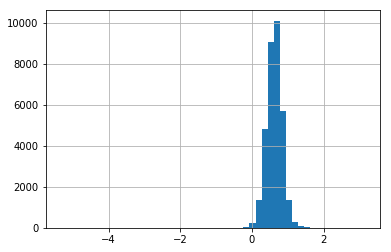

In [63]:
output['dif'].hist(bins=50)

In [69]:
best_esc_pred4 = output_sort_dif.head(1000)

In [70]:
best_esc_pred4.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\best_schools\best_esc_pred4(sem_ideb).csv')